In [17]:
# Import CSV to DataSet
import pandas

from config_secret import DATA_DIR

accidents_data_file = '/Stats19-Data1979-2004/Accidents7904.csv'
accidents_file = DATA_DIR + accidents_data_file

accidents = pandas.read_csv(
    accidents_file,
    sep=',',
    header=0,
    index_col=False,
    parse_dates=['Date'],
    dayfirst=True,
    tupleize_cols=False,
    error_bad_lines=True,
    warn_bad_lines=True,
    skip_blank_lines=True,
    nrows=10000,
)

In [18]:
# Create report columns

data_types = pandas.DataFrame(
    accidents.dtypes,
    columns=['Data Type']
)

missing_data_counts = pandas.DataFrame(
    accidents.isnull().sum(),
    columns=['Missing Values']
)

present_data_counts = pandas.DataFrame(
    accidents.count(),
    columns=['Present Values']
)

unique_value_counts = pandas.DataFrame(columns=['Unique Values'])
for v in list(accidents.columns.values):
    unique_value_counts.loc[v] = [accidents[v].nunique()]

minimum_values = pandas.DataFrame(columns=['Minimum Value'])
for v in list(accidents.columns.values):
    try: 
        minimum_values.loc[v] = [accidents[v].min()]
    except:
        pass
    
maximum_values = pandas.DataFrame(columns=['Maximum Value'])
for v in list(accidents.columns.values):
    try:
        maximum_values.loc[v] = [accidents[v].max()]
    except:
        pass


In [19]:
# Merge all DataFrames

data_quality_report = data_types.join(present_data_counts).join(
    missing_data_counts).join(unique_value_counts).join(
    minimum_values).join(maximum_values)

print('\nDATA QUALITY REPORT')
print('Total records: {}'.format(len(accidents.index)))
data_quality_report


DATA QUALITY REPORT
Total records: 10000


,Data Type,Present Values,Missing Values,Unique Values,Minimum Value,Maximum Value
﻿Accident_Index,object,10000,0,10000,197901A11AD14,197901COVHO63
Location_Easting_OSGR,float64,9976,24,6423,23670,615770
Location_Northing_OSGR,float64,9976,24,1000,0,999000
Longitude,float64,0,10000,0,NaN,NaN
Latitude,float64,0,10000,0,NaN,NaN
Police_Force,int64,10000,0,1,1,1
Accident_Severity,int64,10000,0,3,1,3
Number_of_Vehicles,int64,10000,0,9,1,13
Number_of_Casualties,int64,10000,0,9,1,12
Date,datetime64[ns],10000,0,83,1979-01-01 00:00:00,1979-03-24 00:00:00


In [20]:
accidents.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Location_Easting_OSGR,9976,295877.760626,106278.972927,23670,231747.5,298475,363585,615770
Location_Northing_OSGR,9976,501321.271051,289582.309746,0,239000.0,509000,753000,999000
Longitude,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Police_Force,10000,1.000000,0.000000,1,1.0,1,1,1
Accident_Severity,10000,2.840300,0.396499,1,3.0,3,3,3
Number_of_Vehicles,10000,1.689800,0.728855,1,1.0,2,2,13
Number_of_Casualties,10000,1.236900,0.620336,1,1.0,1,1,12
Day_of_Week,10000,4.207400,1.928252,1,3.0,4,6,7
Local_Authority_(District),10000,29.160700,76.399230,1,8.0,17,26,513


In [21]:
accidents.describe(include=['object']).transpose()

,count,unique,top,freq
﻿Accident_Index,10000,10000,197901C9LDD36,1
Time,9998,286,08:30,114


In [22]:
# Get the mode of the columns
accidents.mode().transpose()

,0,1
﻿Accident_Index,NaN,NaN
Location_Easting_OSGR,334880,NaN
Location_Northing_OSGR,9000,NaN
Longitude,NaN,NaN
Latitude,NaN,NaN
Police_Force,1,NaN
Accident_Severity,3,NaN
Number_of_Vehicles,2,NaN
Number_of_Casualties,1,NaN
Date,1979-01-29 00:00:00,1979-02-23 00:00:00


In [23]:
# Generate frequency table for a single column
import numpy

casualty_count = accidents.groupby('Date').agg(
    {'Number_of_Casualties': numpy.sum})
casualty_count

,Number_of_Casualties
Date,
1979-01-01,55
1979-01-02,63
1979-01-03,75
1979-01-04,68
1979-01-05,96
1979-01-06,130
1979-01-07,94
1979-01-08,134
1979-01-09,152


In [24]:
# Add another column
vehicle_count = accidents.groupby('Date').agg(
    {'Number_of_Vehicles': numpy.sum})
vehicle_count

,Number_of_Vehicles
Date,
1979-01-01,78
1979-01-02,86
1979-01-03,103
1979-01-04,94
1979-01-05,147
1979-01-06,169
1979-01-07,131
1979-01-08,192
1979-01-09,216


In [25]:
casualties_and_vehicles = casualty_count.merge(
    vehicle_count, left_index=True, right_index=True)
casualties_and_vehicles

,Number_of_Casualties,Number_of_Vehicles
Date,,
1979-01-01,55,78
1979-01-02,63,86
1979-01-03,75,103
1979-01-04,68,94
1979-01-05,96,147
1979-01-06,130,169
1979-01-07,94,131
1979-01-08,134,192
1979-01-09,152,216


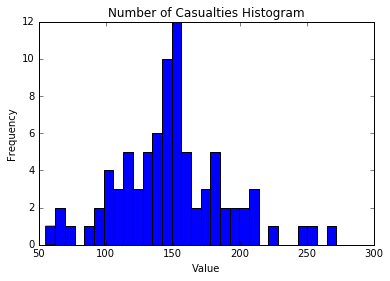

In [26]:
# Create histogram
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.hist(casualty_count['Number_of_Casualties'], bins=30)
plt.title('Number of Casualties Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

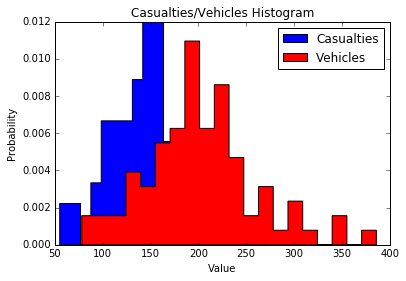

In [27]:
# Plot two sets of values
plt.hist(casualty_count['Number_of_Casualties'], bins=20,
        histtype='stepfilled', normed=True, color='b', 
        label='Casualties')
plt.hist(vehicle_count['Number_of_Vehicles'], bins=20, 
        histtype='stepfilled', normed=True, color='r',
        label='Vehicles')
plt.title('Casualties/Vehicles Histogram')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend()
plt.show()

